<a href="https://colab.research.google.com/github/nermienkh/CIT690-Deep-Learning/blob/main/Copy_of_CIT_690E%D9%90_Assignment_3_Q2%263%20Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2) Python-Pytorch: Using MNIST dataset, compare in terms of the train and
test accuracies of two different ConvNet models (kernel width 5, 32 filters) at:
• Stride of 1 and 2.
• Calculate the total number of parameters for each case.



In [2]:
import torch
from torchvision import transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import Datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

mnist_valset, mnist_testset = torch.utils.data.random_split(mnist_testset, [int(0.9 * len(mnist_testset)), int(0.1 * len(mnist_testset))])

train_dataloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_valset, batch_size=32, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(mnist_testset, batch_size=32, shuffle=False)

print("Training dataset size: ", len(mnist_trainset))
print("Validation dataset size: ", len(mnist_valset))
print("Testing dataset size: ", len(mnist_testset))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training dataset size:  60000
Validation dataset size:  9000
Testing dataset size:  1000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
#Explore image tensor shape
img = mnist_trainset[0][0]
type(img)
img.shape

torch.Size([1, 28, 28])

In [15]:
#Module case2
#output equation ((N-f+2P)/s)+1
#Output Shape L1conv= ((28-5+2*1)/2)+1=,  14*14*(32) no. of filters
#output shape L2 maxpool = (14-2/2)+1=7,  7*7*32
#output shape L3conv=((7-5+2)/2)+1=3,     3*3*64
#output shape L4pool=((3-2+0)/2)+1=2      # didn't work with 2 sp I changed it to 1*1 and it worked  1*1*64
#-------------------------------------------------------
#Calcualte Number of Paramters [conv=>(((kernal width*kernal height* pervoiuslayers)+1)*currentlayers)], [fullyconnected=>(inputs+1)*output]
#Conv Layer1 ((5*5*1)+1)*32=>832
#Maxpool =>0
#L3Conv ((5*5*32)+1)*64=>51264
#L4max =>0
#L5Linear (64+1)*128=> 8320 
#L6Linear  (128+1)*10=>1290
#Total number of parameters= 61706
#------------------------------------------------------
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=2, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=2, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(1*1* 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()


    def forward(self, x):
        x = self.conv_1(x)#L1
        x = self.relu(x)
        x = self.max_pool2d(x)#L2
        x = self.conv_2(x)#L3
        x = self.relu(x)
        x = self.max_pool2d(x) #L4
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x) #L5
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred



In [16]:

model = CNN()


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


if (torch.cuda.is_available()):
    model.cuda()

In [20]:
no_epochs = 100
train_loss = list()
val_loss = list()
best_val_loss = 1


Epoch: 1/100, Train Loss: 0.02351470, Val Loss: 0.04719080, Val Accuracy: 0.98644444
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.04719080

Epoch: 2/100, Train Loss: 0.01952875, Val Loss: 0.04176868, Val Accuracy: 0.98922222
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.04176868

Epoch: 3/100, Train Loss: 0.01852565, Val Loss: 0.04625992, Val Accuracy: 0.98755556

Epoch: 4/100, Train Loss: 0.01593132, Val Loss: 0.04504726, Val Accuracy: 0.98877778

Epoch: 5/100, Train Loss: 0.01466428, Val Loss: 0.05305029, Val Accuracy: 0.98700000

Epoch: 6/100, Train Loss: 0.01336268, Val Loss: 0.05052825, Val Accuracy: 0.98800000

Epoch: 7/100, Train Loss: 0.01374600, Val Loss: 0.05399240, Val Accuracy: 0.98655556

Epoch: 8/100, Train Loss: 0.01222738, Val Loss: 0.05412957, Val Accuracy: 0.98733333

Epoch: 9/100, Train Loss: 0.01181025, Val Loss: 0.05196884, Val Accuracy: 0.98866667

Epoch: 10/100, Train Loss: 0.00998007, Val Loss: 0.05413919, Val 

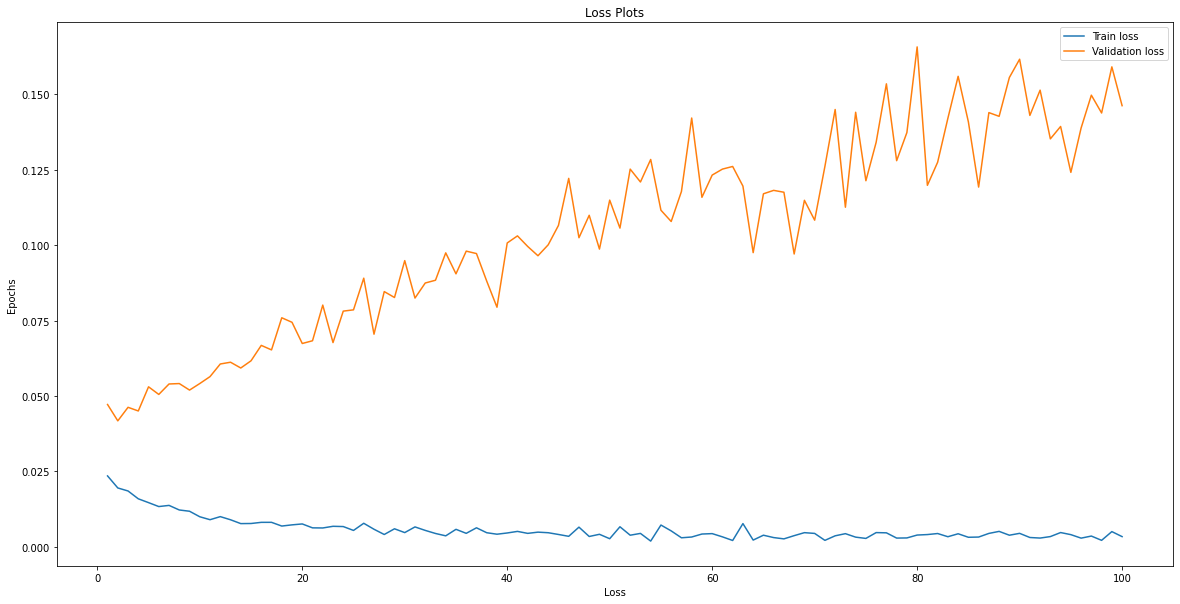

In [21]:
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    # training
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")

fig=plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, no_epochs+1), train_loss, label="Train loss")
plt.plot(np.arange(1, no_epochs+1), val_loss, label="Validation loss")
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title("Loss Plots")
plt.legend(loc='upper right')
plt.show()

In [22]:
# test model
model.load_state_dict(torch.load("model.dth"))
model.eval()

# store correct predictions
correct_results = list()
# store wrong predictions
wrong_results = list()
total = 0
for itr, (image, label) in enumerate(test_dataloader):

    if (torch.cuda.is_available()):
        image = image.cuda()
        label = label.cuda()

    pred = model(image)
    pred = torch.nn.functional.softmax(pred, dim=1)

    for i, p in enumerate(pred):
        if label[i] == torch.max(p.data, 0)[1]:
            total = total + 1
            correct_results.append((image, torch.max(p.data, 0)[1]))

        else:
          wrong_results.append((image, torch.max(p.data, 0)[1]))

test_accuracy = total / len(mnist_testset)
print('Test accuracy {:.8f}'.format(test_accuracy))

Test accuracy 0.99300000


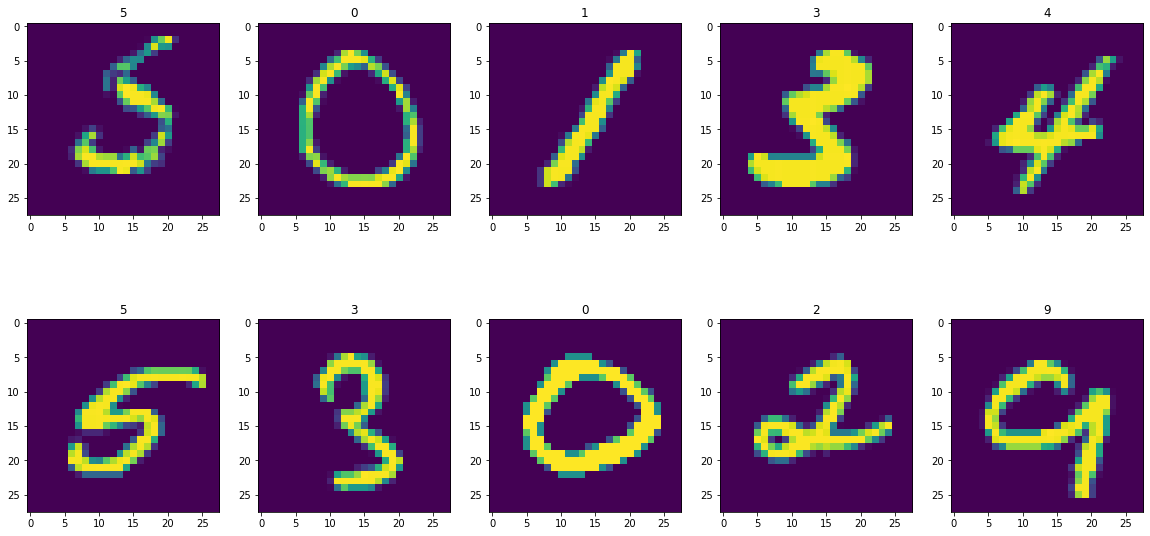

In [23]:
# visualize correct results
fig=plt.figure(figsize=(20, 10))
for i in range(1, min(11, len(correct_results))):

    img = transforms.ToPILImage(mode='L')(correct_results[0][0][i])
    fig.add_subplot(2, 5, i)
    plt.title(correct_results[i][1].item())
    plt.imshow(img)
plt.show()

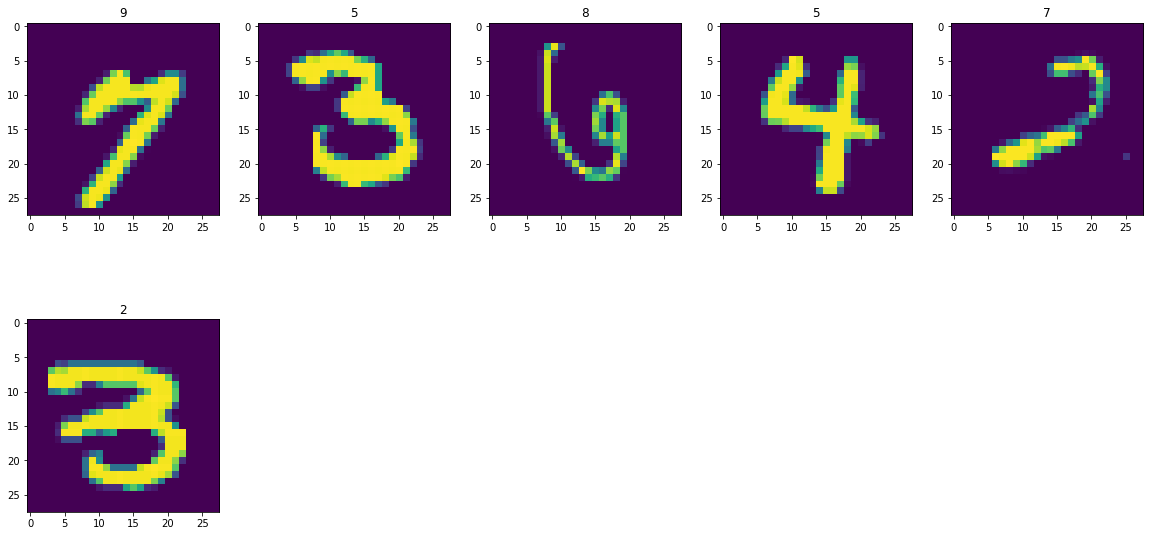

In [24]:
# visualize wrong results
fig=plt.figure(figsize=(20, 10))
for i in range(1, min(11, len(wrong_results))):

    img = transforms.ToPILImage(mode='L')(wrong_results[0][0][i])
    fig.add_subplot(2, 5, i)
    plt.title(wrong_results[i][1].item())
    plt.imshow(img)
plt.show()